<h2>Import Libraries</h2>

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt

<h2>a) Creating Discriminant Function</h2>

<b>Below block will be discriminant function for each class</b>

In [21]:
def normal_dist(x, mean, sd):
    term1 = 1/(math.sqrt(2*np.pi)*sd)
    prob_density = term1 * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

def discriminant_function(prob_density, prior):
    return prob_density*prior

<b>Below block will be discriminant function for problem</b>

In [22]:
def problem_discriminant(g_1, g_2):
    return g_1 - g_2

<h2>b) Decision Boundary</h2>

<b>For decision boundary we need to find minimum of "problem_discriminant(g_1, g_2)"</b>

In [23]:
def decision_boundary(Gx , C1 , C2):
    Gx = abs(Gx)
    index = np.argmin(Gx)
    return (C1[index]+C2[index])/2

<h2>c) Prior Probability Effect</h2>

<b>If prior probability of g_1 increases, decision boundary will slide more near to g_1 becuse it make g_1 bigger</b>

<h2>d) Making Samples</h2>

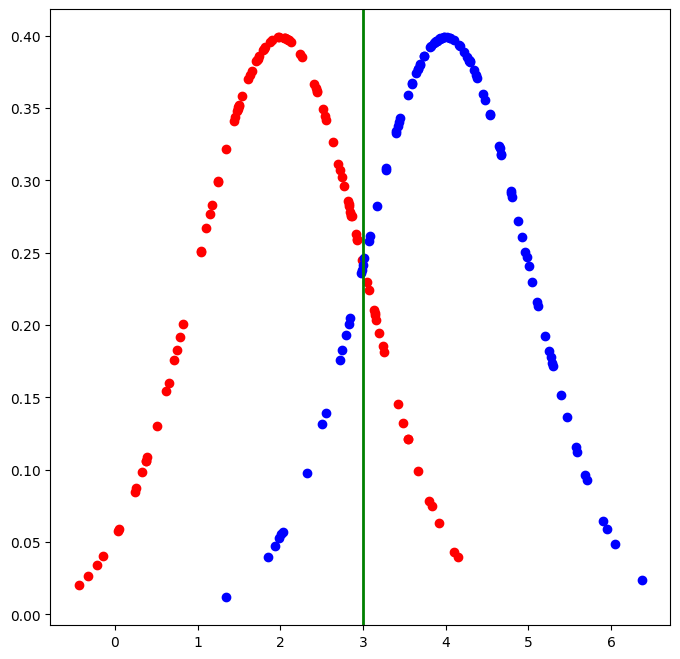

In [24]:
mu1 = 2
sigma1 = 1
prior1 = 0.5

mu2 = 4
sigma2 = 1
prior2 = 0.5

np.random.seed(243)
C1Samples = np.random.normal(mu1, sigma1, 100)
C2Samples = np.random.normal(mu2, sigma2, 100)
C1perm = normal_dist(C1Samples, mu1, sigma1)
C2perm = normal_dist(C2Samples, mu2, sigma2)

g_1 = discriminant_function(C1perm, prior1)
g_2 = discriminant_function(C2perm, prior2)
Gx = problem_discriminant(g_1, g_2)
DB = decision_boundary(Gx, C1Samples, C2Samples)

plt.figure(figsize = (8, 8))
plt.scatter(C1Samples, normal_dist(C1Samples, mu1, sigma1), c = 'red', label = 'C1')
plt.scatter(C2Samples, normal_dist(C2Samples, mu2, sigma2), c = 'blue', label = 'C2')
plt.axvline(x = DB, color = 'g', linestyle = '-', linewidth=2, label = 'Decision Boundary')
plt.show()

<h2>e) Precision ,Accuracy ,Confusion matrix and ...</h2>

In [25]:
def predict(data , DB):
    ans = np.zeros(len(data))
    for i in range(len(data)):
        if data[i]> DB:
            ans[i] = 2
        else:
            ans[i] = 1
    return ans

In [26]:
def count(data, val):
    ans = 0
    for i in range(len(data)):
        if(data[i] == val):
           ans = ans + 1
    return ans

In [27]:
predictC1 = predict(C1Samples, DB)
predictC2 = predict(C2Samples, DB)

TP = count(predictC1, 1)
TN = count(predictC2, 2)
FP = 100 - TP
FN = 100 - TN

precision = 100*TP/(TP + TN)
recall = 100*TN/(TP + TN)
accuracy = 100*(TP + TN)/(TP + TN + FN + FP)
confusion_matrix = np.array([[TP, FP], [TN, FN]])
F1Score = (2 * precision * recall)/(precision + recall)
print('precision:',precision)
print('recall:',recall)
print('accuracy:',accuracy)
print('confusion matrix:\n',confusion_matrix)
print('F1Score:',F1Score)

precision: 49.390243902439025
recall: 50.609756097560975
accuracy: 82.0
confusion matrix:
 [[81 19]
 [83 17]]
F1Score: 49.99256395002974


<h2>f) ROC Curve</h2>

837.4528192505684


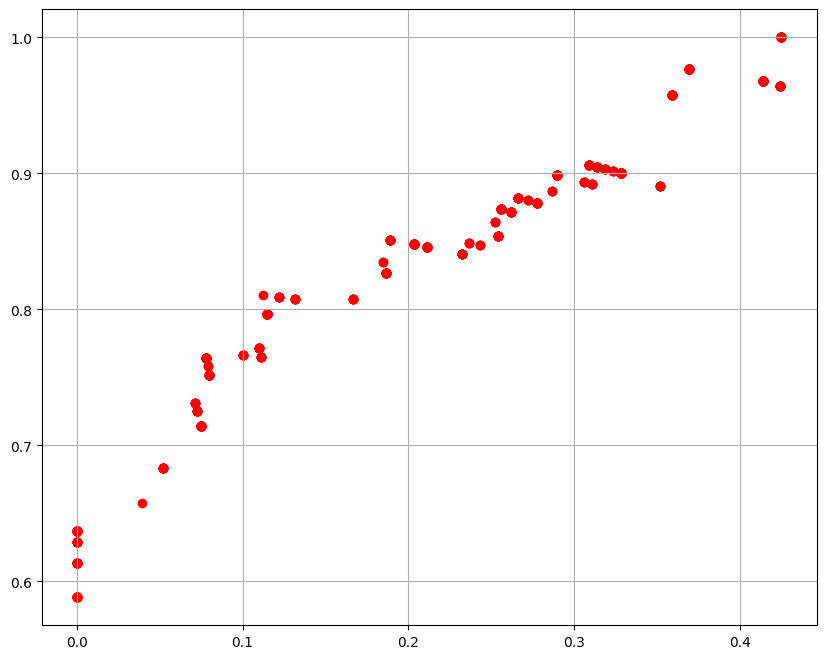

In [28]:
TPR = np.zeros(1000)
FPR = np.zeros(1000)
sum = 0

priorTest1 = 0
priorTest2 = 1

for i in range(1000):
    g_1_test = discriminant_function(C1perm, priorTest1)
    g_2_test = discriminant_function(C2perm, priorTest2)
    Gx_test = problem_discriminant(g_1_test, g_2_test)
    DB_test = decision_boundary(Gx_test, C1Samples, C2Samples)
    predictC1Test = predict(C1Samples, DB_test)
    predictC2Test = predict(C2Samples, DB_test)
    TP = count(predictC1Test, 1)
    FP = 100 - TP
    TN = count(predictC2Test, 2)
    FN = 100 - TN
    TPR[i] = TP/(TP + FN)
    FPR[i] = FP/(FP + TN)
    sum = sum + TPR[i]
    priorTest1 = priorTest1 + 0.001
    priorTest2 = priorTest2 - 0.001
print(sum)
plt.figure(figsize = (10, 8))
plt.grid()
plt.scatter(FPR, TPR, c = 'red', label = 'C1')
plt.show()

<h2>g) Changing prior probablities</h2>

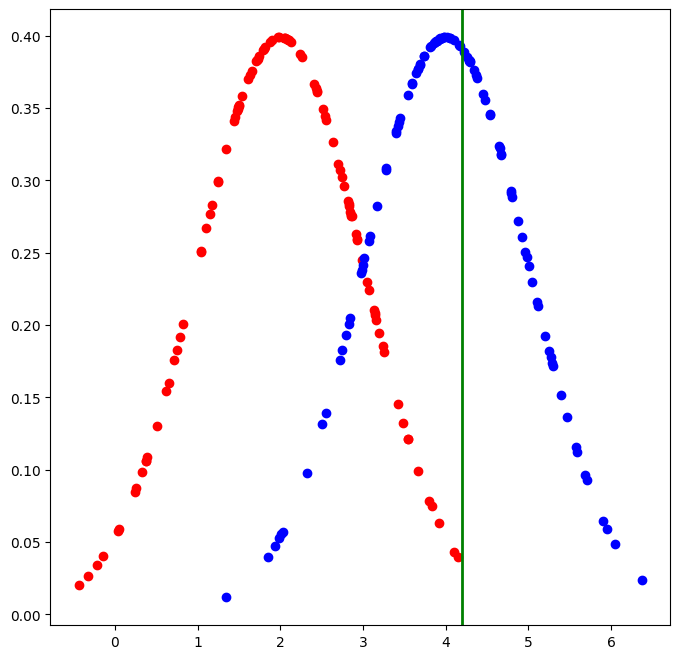

In [29]:
prior1 = 0.9
prior2 = 0.1

C1perm = normal_dist(C1Samples, mu1, sigma1)
C2perm = normal_dist(C2Samples, mu2, sigma2)

g_1 = discriminant_function(C1perm, prior1)
g_2 = discriminant_function(C2perm, prior2)
Gx = problem_discriminant(g_1, g_2)
DB = decision_boundary(Gx, C1Samples, C2Samples)

plt.figure(figsize = (8, 8))
plt.scatter(C1Samples, normal_dist(C1Samples, mu1, sigma1), c = 'red', label = 'C1')
plt.scatter(C2Samples, normal_dist(C2Samples, mu2, sigma2), c = 'blue', label = 'C2')
plt.axvline(x = DB, color = 'g', linestyle = '-', linewidth=2, label = 'Decision Boundary')
plt.show()

In [30]:
predictC1 = predict(C1Samples, DB)
predictC2 = predict(C2Samples, DB)

TP = count(predictC1, 1)
TN = count(predictC2, 2)
FP = 100 - TP
FN = 100 - TN

precision = 100*TP/(TP + TN)
recall = 100*TN/(TP + TN)
accuracy = 100*(TP + TN)/(TP + TN + FN + FP)
confusion_matrix = np.array([[TP, FP], [TN, FN]])
F1Score = (2 * precision * recall)/(precision + recall)
print('precision:',precision)
print('recall:',recall)
print('accuracy:',accuracy)
print('confusion matrix:\n',confusion_matrix)
print('F1Score:',F1Score)

precision: 69.93006993006993
recall: 30.06993006993007
accuracy: 71.5
confusion matrix:
 [[100   0]
 [ 43  57]]
F1Score: 42.05584625165044
